<a href="https://colab.research.google.com/github/sumitkmr93/Predictive-Analytics-California-Housing/blob/master/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **California Housing Price Prediction**

In [1]:
# Importing all required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Getting the data, from Github repo.

url = 'https://github.com/sumitkmr93/Predictive-Analytics-California-Housing/blob/master/housing.csv?raw=true'
housingDF = pd.read_csv(url)
housingDF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Exploratory Data Analysis


**Take a Quick Look at the Data Structure** 

*   The ***info()*** method is useful to get a quick description of the data, in particular the total number of rows, each attribute’s type, and the number of nonnull values.

In [3]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


*   Notice that the total_bedrooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing this feature. We will need to take care of this later.
*   Next, You can find out what categories exist and how many districts belong to each category by using the ***value_counts()*** method.


In [4]:
housingDF.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

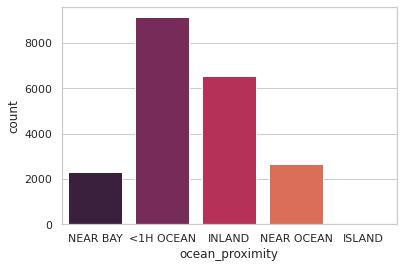

In [5]:
# Plotting the above stats using Seaborn library
sns.set_theme(style="whitegrid")
sns.countplot(x=housingDF.ocean_proximity,palette="rocket")

*   The ***describe()*** method shows a summary of the numerical attributes.


In [6]:
housingDF.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


*   Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. *A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis)*. You can either plot this one attribute at a time, or you can call the ***hist()*** method on the whole dataset, and it will plot a histogram for each numerical attribute.

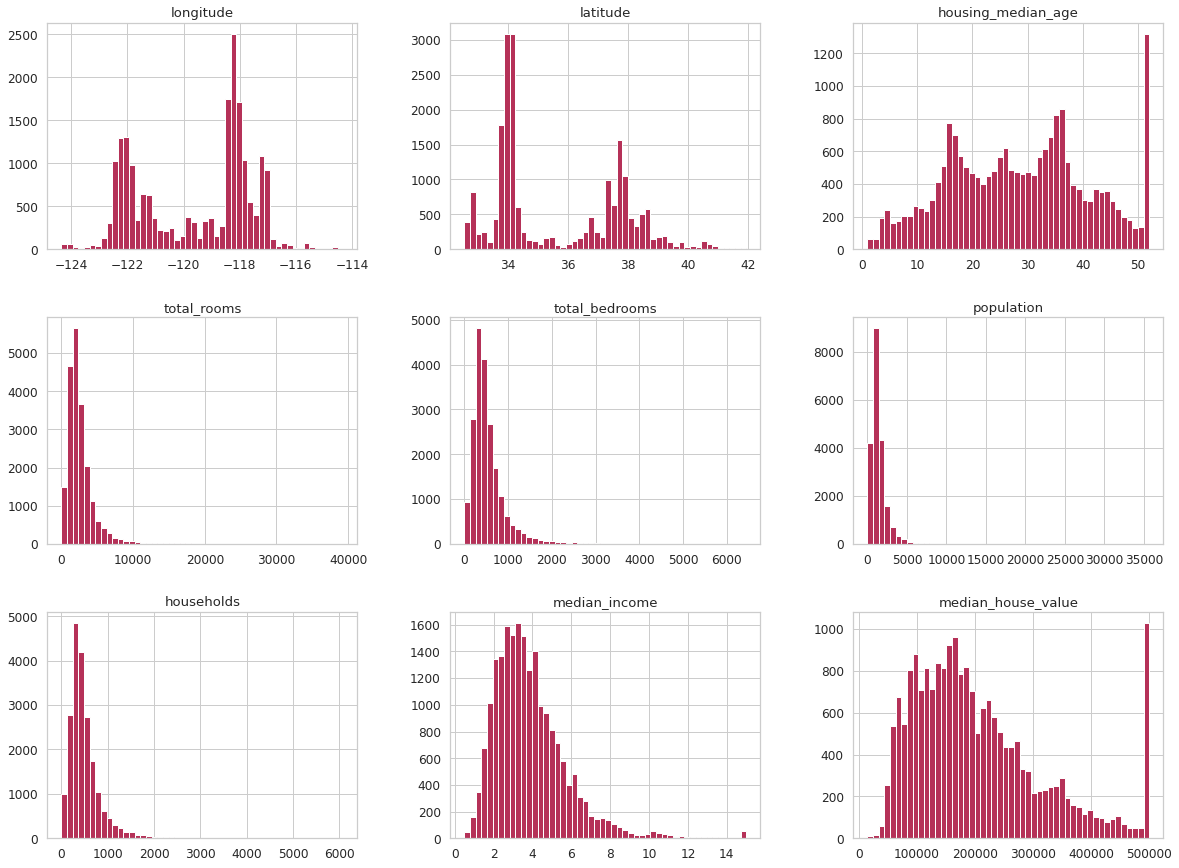

In [7]:
sns.set(style='whitegrid',  font_scale=1.1, rc={"figure.figsize": [20, 15]})
housingDF.hist(bins=50,color='#b53158')
plt.show()

**Findings from the above histograms:**

1. Many histograms are ***tail-heavy***: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

2.  The *median income* attribute does not look like it is expressed in US dollars (USD).
[ Given in Problem Statement: The data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000) ]. 

3. The *housing median age* and the *median house value* were also capped. The latter may be a serious problem since it is the target attribute. 



---




* Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the **corr()** method.

In [8]:
# Compute pairwise correlation of columns, excluding NA/null values. Using the default "pearson" method
housingDF.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


* The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to 0 mean that there is no linear correlation.

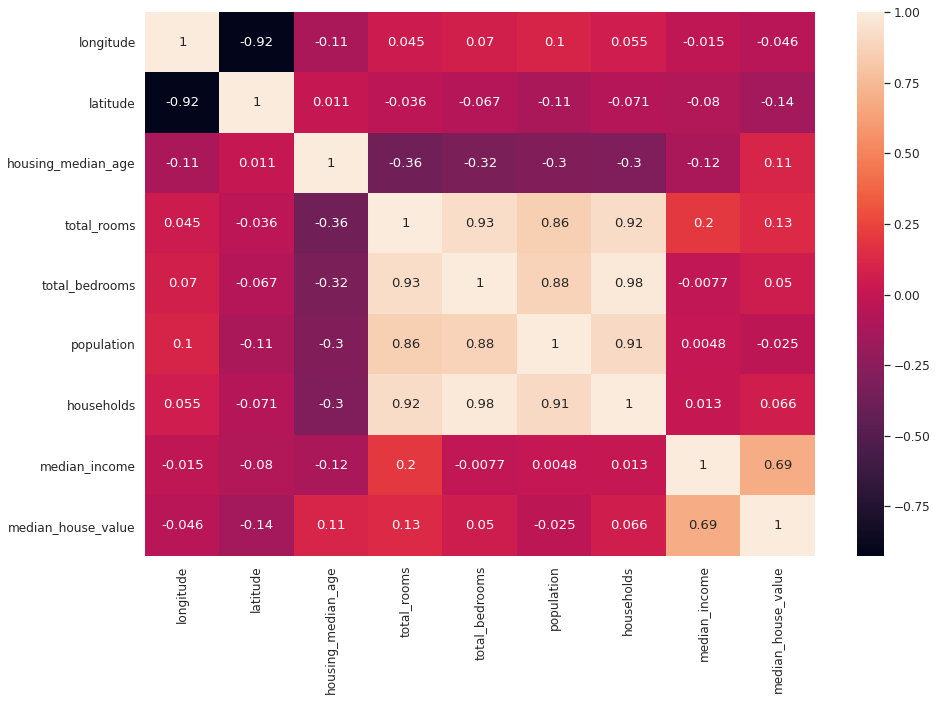

In [9]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [15, 10]})
sns.heatmap(housingDF.corr(), annot=True, cmap='rocket')
plt.show()

In [10]:
# Sorting the correlations in descending order to get the most correlated attribute with the target attribute.
housingDF.corr().sort_values(ascending=False,by='median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

* The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot.

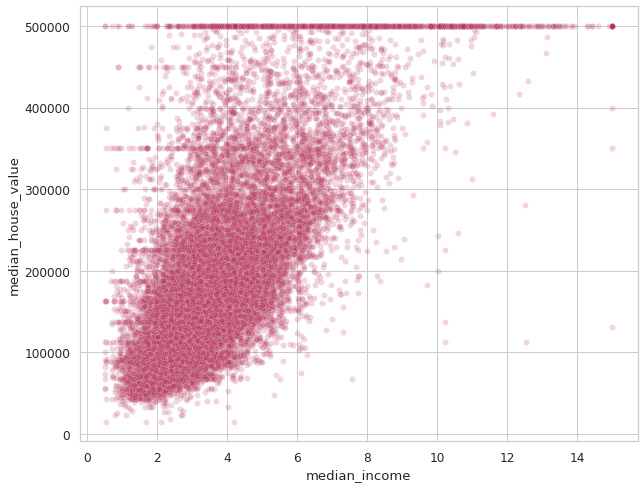

In [11]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 8]})
sns.scatterplot(data=housingDF,x=housingDF.median_income,y=housingDF.median_house_value,color='#b53158',alpha=0.2)
plt.show()

* The above plot reveals a few things. First, the correlation is indeed very strong; we can clearly see the upward trend, and the points are not too dispersed. Second, the price cap that we noticed earlier is clearly visible as a horizontal line at \$500,000. But this plot reveals other less obvious straight lines: a horizontal line around \$450,000, another around \$350,000, perhaps one around \$280,000, and a few more below that. We need to try removing the corresponding districts to prevent our algorithms from learning to reproduce these data quirks.

* Experimenting Attribute Combinations

  One last thing we want to do before preparing the data for Machine Learning algorithms is to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if we don’t know how many households there are. What we really want is the number of rooms per household.

In [12]:
housingDF["rooms_per_household"] = housingDF["total_rooms"]/housingDF["households"]
housingDF["bedrooms_per_room"] = housingDF["total_bedrooms"]/housingDF["total_rooms"]
housingDF["population_per_household"]=housingDF["population"]/housingDF["households"]

* Looking at the correlation matrix again, we see that the new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.

In [13]:
housingDF.corr().sort_values(ascending=False,by='median_house_value').median_house_value

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

**Visualizing Geographical Data**

* Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data.

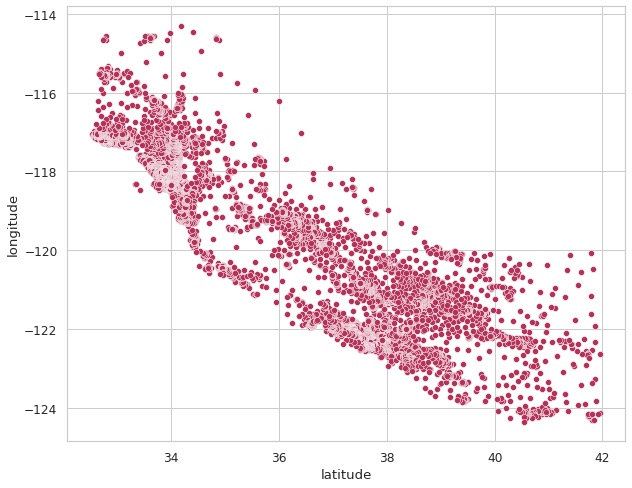

In [14]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10,8]})
sns.scatterplot(data=housingDF,x=housingDF.latitude,y=housingDF.longitude,color='#b53158')
plt.show()

* This looks like ***California*** all right, but other than that it is hard to see any particular pattern. Setting the ***alpha option to 0.1*** makes it much easier to visualize the places where there is a high density of data points.

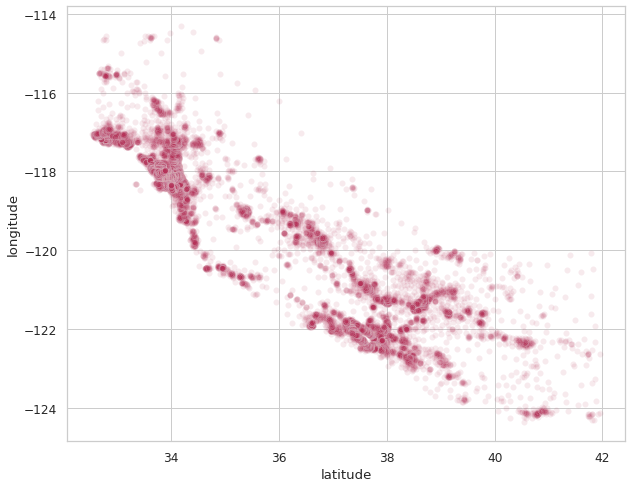

In [15]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 8]})
sns.scatterplot(data=housingDF,x=housingDF.latitude,y=housingDF.longitude,color='#b53158',alpha=0.1)
plt.show()

* One can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.


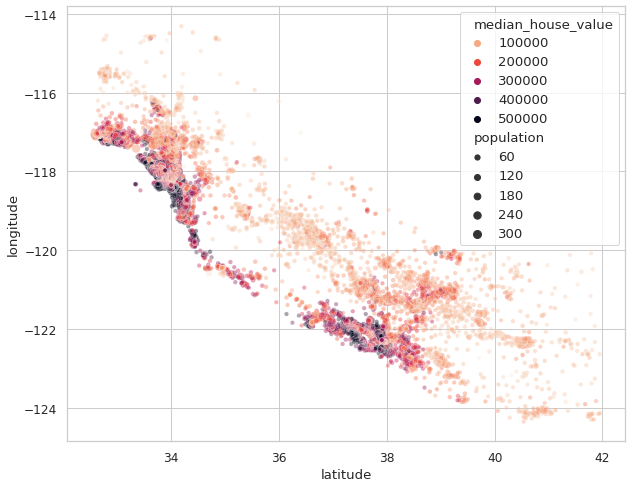

In [16]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10,8]})
sns.scatterplot(
    data=housingDF,
    x=housingDF.latitude,
    y=housingDF.longitude,
    alpha=0.4,
    palette='rocket_r',
    hue=housingDF.median_house_value,
    size=housingDF.population/100)
plt.show()

* This plot tells us that the housing prices are very much related to the location (e.g. close to the ocean) and to the population density.

### Data Cleaning/Transformation

* After taking a quick glance at the data, we should learn a whole lot more about it before you decide what algorithms to use, to avoid **snooping bias**.

* Considering purely random sampling methods is generally fine if we our dataset is large enough (especially relative to the number of attributes), but if it is not, we run the risk of introducing a significant **sampling bias**.

* [Stratified Sampling](https://en.wikipedia.org/wiki/Stratified_sampling): This is a sampling technique that is best used when a statistical population can easily be broken down into distinctive sub-groups. Then samples are taken from each sub-groups based on the ratio of the sub groups size to the total population.

* Looking at the correlation heatmap generated above, we can observe that median_income is highly correlated to the target, having **‘0.69’**, and therfore it is a very important attribute to predict median housing prices.

* Since the median income is a continuous numerical attribute, we first need to create an income category attribute. Looking at the median income histogram more closely we see that most median income values are clustered around **1.5 to 6 (i.e., \$15,000–\$60,000)**, but some median incomes go far beyond 6.

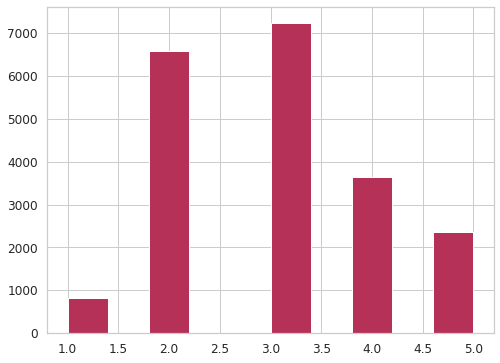

In [17]:
# Splitting data into training and test sets using Stratified Sampling.

# To avoid creating too many strats, each stratum should be large enough. We will use the pd.cut() function to create an income category attribute with five categories.
housingDF['income_category'] = pd.cut(housingDF['median_income'],
                                      bins = [0.,1.5,3.0,4.5,6.0, np.inf],
                                      labels = [1,2,3,4,5])

# These income categories are represented as:
sns.set(style='whitegrid',  font_scale=1.1, rc={"figure.figsize": [8, 6]})
housingDF['income_category'].hist(color='#b53158')
plt.show()


* Now we are ready to do stratified sampling based on the income category. For this we will use Scikit-Learn’s **StratifiedShuffleSplit** class:

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split_data = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split_data.split(housingDF,housingDF.income_category):
  stfd_train_set = housingDF.loc[train_index]
  stfd_test_set = housingDF.loc[test_index]

In [19]:
# To check if this worked we can look at the income category proportions in the test set.
stfd_test_set.income_category.value_counts()/len(stfd_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

*  We can see above, that the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset.

* Now we should remove the income_cat attribute so the data is back to its original state.

In [20]:
for set_ in (stfd_train_set, stfd_test_set,housingDF):
    set_.drop("income_category", axis=1, inplace=True)

* Further splitting into X and Y train and test sets.

In [21]:
X_train = stfd_train_set.drop('median_house_value',axis=1)
y_train = stfd_train_set.median_house_value
X_test = stfd_test_set.drop('median_house_value',axis=1)
y_test = stfd_test_set.median_house_value

* Most Machine Learning algorithms cannot work with missing features, Scikit-Learn provides a handy class to take care of missing values: **SimpleImputer**. The result is a plain **NumPy array** containing the transformed features.

In [22]:
from sklearn.impute import SimpleImputer

# Getting all numerical feature for later use in pieplines
X_train_num = X_train.drop('ocean_proximity',axis=1)

* Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, Scikit-Learn provides a **OneHotEncoder** class to convert categorical values into one-hot vectors. It creates one binary attribute per category.

* The output is a **SciPy sparse matrix**, instead of a NumPy array. After one-hot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. We can use it mostly like a normal 2D array, we can convert it to a (dense) NumPy array, just by calling the *toarray()* method.

In [23]:
from sklearn.preprocessing import OneHotEncoder

* **Custom Transformers**: Although Scikit-Learn provides many useful transformers, sometimes we need to write our own for tasks such as custom cleanup operations or combining specific attributes.

* Scikit-Learn relies on duck typing (not inheritance), so we create a class and implement three methods: fit() (returning self), transform(), and fit_transform().
Tip: We can get the last one for free by simply adding **TransformerMixin** as a base class. Also, if we add **BaseEstimator** as a base class (and avoid *args and **kargs in your constructor), we will get two extra methods (get_params() and set_params()) that will be useful for **automatic hyperparameter tuning**.

In [24]:
# Here is a small transformer class that adds the combined attributes we discussed earlier (rooms_per_household, bedrooms_per_room, population_per_household)

from sklearn.base import BaseEstimator,TransformerMixin

rooms, bedrooms, population,households = 3,4,5,6 #allocating index valuses from original dataframes.

class CombiedAttributesTransformer(BaseEstimator, TransformerMixin):
  
  def __init__(self,add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self

  def transform(self,X):
    rooms_per_household = X[:,rooms] / X[:,households]
    population_per_household = X[:,population] / X[:,households]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:,bedrooms] / X[:,rooms]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

* In the code above; the transformer has one hyperparameter, **add_bedrooms_per_room**, set to True by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about.

* **Feature Scaling**: One of the most important transformations we apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. In our case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. *Note that scaling the target values is generally not required*.

 There are two common ways to get all attributes to have the same scale: **min-max scaling** and **standardization**.

* **Transformation Pipelines**:As we know, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the **Pipeline** class to help with such sequences of transformations.

In [25]:
# Pipeline for Numerical Features

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numerical_pipeline = Pipeline([
                               ('imputer', SimpleImputer(strategy='median')),
                               ('attribute_adder', CombiedAttributesTransformer()),
                               ('standard_scaler',StandardScaler())
])

* Scikit-Learn introduced the **ColumnTransformer**, which is a single transformer that is able to handle all columns, and applying the appropriate transformations to each column.

In [26]:
# Pipeline (ColumnTranformer) to handle numerical and categorical column at once.

from sklearn.compose import ColumnTransformer

numerical_attributes = list(X_train_num)
categorical_attributes = ['ocean_proximity']

complete_pipeline = ColumnTransformer([
                                      ('numerical',numerical_pipeline,numerical_attributes),
                                      ('categorical',OneHotEncoder(),categorical_attributes)
])

* Note that the OneHotEncoder returns a sparse matrix, while the numerical_pipeline returns a dense matrix. When there is such a mix of sparse and dense matrices, the ColumnTransformer estimates the density of the final matrix (i.e., the ratio of nonzero cells), and it returns a sparse matrix if the density is lower than a given threshold (by default, sparse_threshold=0.3).

 In our use case, it returns a dense matrix. 

### Training & Evaluation of Models

* We are now ready to select and train a Machine Learning model.

> Linear Regression 

In [27]:
# Starting with simple Linear Regression Model

from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()


* Measuring this regression model’s RMSE on the whole training set using Scikit-Learn’s **mean_squared_error()** function


In [28]:
# Evaluation pipeline bundles the preprocessing and modeling steps.

from sklearn.metrics import mean_absolute_error

linear_train_eval_pipeline = Pipeline([
                                ('preprocessor',complete_pipeline),
                                ('model',linearmodel)
])

linear_train_eval_pipeline.fit(X_train,y_train)

linear_predictions = linear_train_eval_pipeline.predict(X_test)

mae_score = mean_absolute_error(y_test,linear_predictions)
print('MAE: Score', mae_score)

MAE: Score 48976.681245231855


* Better Evaluation Using Cross-Validation: we run our modeling process on different subsets of the data to get multiple measures of model quality.

In [29]:
from sklearn.model_selection import cross_val_score

# If we perform cross validation on the OneHotEncoded (pipeline) trading data, 
# it will through an error for cases in which the test data doesn't have training samples.
# Hence preprocessing it first and then applying cross validation.
X = housingDF.drop('median_house_value',axis=1)
X_transformed = complete_pipeline.fit_transform(X)
y = housingDF.median_house_value

cv_scores = -1 * cross_val_score(linearmodel, X_transformed, y,
                                 cv=10,
                                 scoring='neg_mean_absolute_error')

print('MAE CV scores:',cv_scores)

# We typically want a single measure of model quality to compare alternative models. 
# So we take the average across experiments.

print('Average MAE CV Score:',cv_scores.mean())

MAE CV scores: [68204.59410268 46382.96986705 61304.85175397 46078.45956378
 59674.79927218 46899.13693196 37690.32751938 66352.59932171
 57249.64591229 38836.02165893]
Average MAE CV Score: 52867.340590392196


* We specify negative MAE. Scikit-learn has a convention where all metrics are defined so a high number is better. Using negatives here allows them to be consistent with that convention, though negative MAE is almost unheard of elsewhere.

* We can see that the score from the mean_absolute_error and cross valiadtion are quite high, we will see how evalutes for different Regression Models.


* We will look into 2 more models: KNN Regressor & Ensemble method


In [30]:
# Defining a function takes in model and data, and returns cross val score.

def get_score(model, input, output, folds ):
  scores = -1 * cross_val_score(model,input,output,
                                cv=folds,
                                scoring='neg_mean_absolute_error') 
  return scores.mean()
  

> KNN Regressor

In [66]:
from sklearn.neighbors import KNeighborsRegressor

knnmodel1 = KNeighborsRegressor() #with all default params
knnmodel2 = KNeighborsRegressor(n_neighbors=3)
knnmodel3 = KNeighborsRegressor(n_neighbors=13,weights='distance')
knnmodel4 = KNeighborsRegressor(n_neighbors=25,weights='distance')

knnmodels = [knnmodel1, knnmodel2, knnmodel3, knnmodel4]

for model in knnmodels:
  print("CV MAE Score for model {} is {}".format(knnmodels.index(model)+1,get_score(model=model,input=X_transformed,output=y,folds=5)))

CV MAE Score for model 1 is 55796.97734496123
CV MAE Score for model 2 is 57366.801824935406
CV MAE Score for model 3 is 54709.9899706274
CV MAE Score for model 4 is 55117.78495115154


* We can see that the KNN Regressor performance is even worse, now we will try the Ensemble method

 The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters.

In [74]:
from sklearn.ensemble import RandomForestRegressor

forest_model1 = RandomForestRegressor()
forest_model2 = RandomForestRegressor(n_estimators=50,max_leaf_nodes=250,random_state=1)
forest_model3 = RandomForestRegressor(n_estimators=450,max_features='log2')
forest_model4 = RandomForestRegressor(n_estimators=150,max_features='sqrt',max_leaf_nodes=50,random_state=1)

forest_models = [forest_model1,forest_model2,forest_model3,forest_model4]

for model in forest_models:
  print("CV MAE Score for model {} is {}".format(forest_models.index(model)+1,get_score(model=model,input=X_transformed,output=y,folds=5)))

CV MAE Score for model 1 is 49576.31496705426
CV MAE Score for model 2 is 50525.28103578731
CV MAE Score for model 3 is 49235.60544121447
CV MAE Score for model 4 is 53549.1376723801


* We can see that the Ensemble method performed better than the other two regression models.

 Clearly the 3rd model performed the best.

 Now we will try hyperparameter tuning to get the best parameters.

### Fine-Tune the Model

 - 1st Option: fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values:

 - 2nd Option: use Scikit-Learn’s GridSearchCV to search for you. All we need to do is tell it which hyperparameters we want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values.

 - 3rd Option: The grid search approach is fine when we are exploring relatively few combinations, but when the hyperparameter search space is large, it is often preferable to use **RandomizedSearchCV** instead.

In [76]:
# searcheing for the best combination of hyperparameter values for the RandomForestRegressor.

from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [50, 250, 450], 'max_features': ['auto','sqrt','log2']},
              {'bootstrap': [False], 'n_estimators': [250, 450], 'max_features': ['auto','sqrt']}
]

forest_regressor = RandomForestRegressor()

grid_search = GridSearchCV(forest_regressor, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_transformed,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

* It may take quite a long time, but when it is done we can check the best combination of parameters

In [77]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 450}

* We can also get the best estimator directly:

In [78]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=450, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

* In this California housing use case, the final performance of the system is not better than the experts’ price estimates, which were often off by about 20%, but it may still be a good idea to launch it, especially if this frees up some time for the experts so they can work on more interesting and productive tasks.